# Pymaceuticals Inc.
---

### Analysis

- We weren't given any directions on what should be in out analysis so I will ame some stuff up to talk about.
- Our data captures what happens to the tumors of mice of diffrerent sexes and ages when the mice are administered various tumor fighting drugs. Each mouse, provided they continued to survive, where given doses of the drugs with the tumor measured by volume and metastatic sites counted every 5 days. 
- Our data shows that mice exposed to Capomulin and Ramicane lived on average longer than all other drugs (see the bar chart). To provide further analysis, our box plot showing Capomulin, Ramicane, Infubinol, and Ceftamine (the suspected most effective two and least effective two respectively), shows it would be a statistical abnormality for a mouse on a Capomulin or Ramicane to have the same final tumor volume as a mouse that on Infubinol and Ceftamine. This suggests that Capomulin and Ramicane are universally more effective than Infubinol and Ceftamine. 
- While unlikely, further analysis should be done to determine if our data was impacted by uneven sex splits impacting the data. For example, we know our mouse population was neary 50/50 split between male and female, but we did not take that into account when calculating the statistics for our four drugs. It is quite possible that our Capomulin population is dominated by one sex and Infubinol is dominated by the other. This would expose a weakness in our comparison.
- We can also explore individual, average trendlines for tumor volume over time for each drug. It is possible that while, Capomulin mice final tumor volumes are lower than Infubinol, it is possible that Capomulin mice generally started with smaller tumors while Infubinol started with larger tumors. Thus, it is possible both sample groups saw tumor growth.
 

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# I had to stackoverflow this one for the exact output in one of the cells below (indicate there)
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='outer')

# Display the data table for preview
df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [151]:
# Checking the number of mice.
mice = df['Mouse ID'].nunique()
mice

249

In [152]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Used numpy here because I didn't know how to get the exact output format.
dup = df[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()
dup2 = np.array(dup)
dup2

array(['g989'], dtype=object)

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = df[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()
dup_data2 = df[df['Mouse ID'].isin(dup_data)]
dup_data2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# We just use the first two columns as indicators of what to drop.

# Also, apparently we need to drop the whole mouse, not just the duplicates??? Otherwise the next
# answer will be 249 not 248. Here is the code if we just wanted to drop the duplicate rows
# but still keep mouse b128. She has been a good mouse.
# df_clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = 'first')
# df_clean.head(5)

# Now here is the code to drop the mouse entirely :(
df_clean = df[df['Mouse ID']!='g989']
df_clean.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [155]:
# Checking the number of mice in the clean DataFrame.
count = df_clean['Mouse ID'].nunique()
count

248

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_stats = df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
sum_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [157]:
# We gotta group by first to see what drugs each mouse took.
drug_obs = df_clean.groupby('Drug Regimen').size().sort_values(ascending = False)
drug_obs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

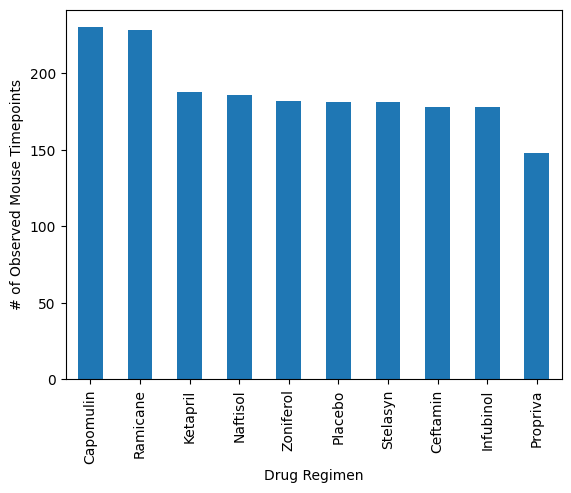

<Figure size 640x480 with 0 Axes>

In [158]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas.

# I'm assuming this is the pandas way...
panda_chart = drug_obs.plot(kind='bar')
panda_chart.set_xlabel('Drug Regimen')
panda_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()
plt.tight_layout()

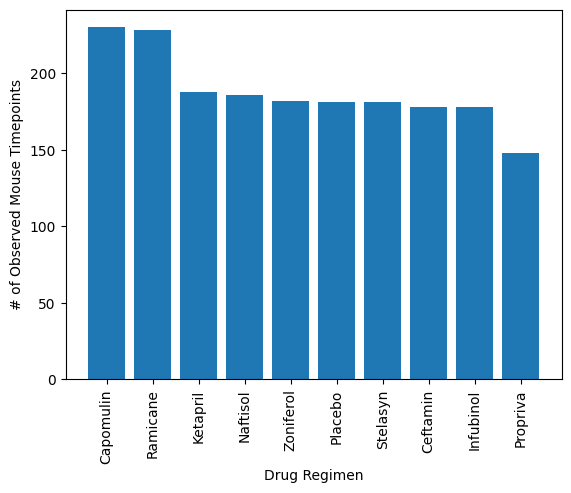

In [159]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#... and that this is the matplotlib way
plt.bar(drug_obs.index, drug_obs)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.show()

In [160]:
# Gotta group male vs female first.
mvf = df_clean.groupby('Sex').size().sort_values(ascending = False)
mvf

Sex
Male      958
Female    922
dtype: int64

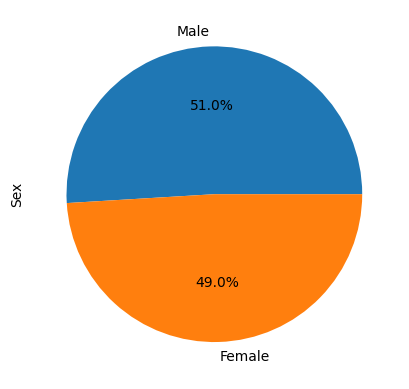

<Figure size 640x480 with 0 Axes>

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mvf_chart = mvf.plot(kind='pie', autopct='%1.1f%%')
mvf_chart.set_ylabel('Sex')
plt.show()
plt.tight_layout()

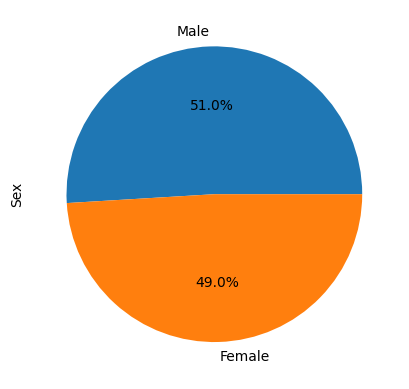

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mvf, labels= mvf.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Assuming we don't have to filter first then sort...
# We can do this using a group by with a max.
fvol = df.groupby('Mouse ID')['Timepoint'].max()
# Then merge the data.
fvol_mouse = pd.merge(df,fvol, on=['Mouse ID', 'Timepoint'])
# Now filter for those drugs
# First set up our drugs as a string so we can plug into the dupes
mouse_drugs = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']
drug_df = fvol_mouse[fvol_mouse['Drug Regimen'].isin(mouse_drugs)]

# If we look at the head(25) of this dataframe, it looks correct as no mouse appears repeated and
# the timepoints are the highest for each mouse when comparing to the index numbers.
# RIP to C326 and V339 who never stood a chance.
drug_df.head(25)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
33,y163,45,67.685569,3,Infubinol,Female,17,27
34,k483,45,66.196912,3,Infubinol,Female,20,30
35,k804,35,62.117279,2,Infubinol,Female,23,29
36,o809,35,55.629428,1,Infubinol,Male,3,25
37,z581,45,62.754451,3,Infubinol,Female,24,25


In [164]:
# Put treatments into a list for for loop (and later for plot labels)
# Actually did this above to sort the list for filtering, but here it is repeated
mouse_drugs = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Okay.
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# I tried creating the df outside the for loop and I got the same answers for every drug, so I tried it inside.
for drug in mouse_drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Using the loc function when drug regimen = drug and we want to extract the tumor volume
    tumor = drug_df.loc[drug_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    # add subset 
    # Can just append here.
    tumor_vol.append(tumor)
    
    # Determine outliers using upper and lower bounds
    # This rest is copy/paste from what we did in class.
    # First we use the quantile method to calculate quartiles
    quartiles = tumor.quantile([.25,.5,.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[.75]
    # Then calculate iqr using that stuff
    iqr = upper_quart - lower_quart
    lower_bound = lower_quart - (1.5 *iqr)
    upper_bound = upper_quart - (1.5 *iqr)
    
    # Now we can find any potential outliers in the tumor df stemming from the filtered drug_df
    pot_outs = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    
    # And then we just print out the list of all the bad ones.
    print(f"{drug}'s potential outliers: {pot_outs}\n")

Capomulin's potential outliers: 0      38.982878
225    38.753265
226    32.377357
228    38.939633
230    41.483008
231    40.728578
232    46.539206
233    31.023923
234    38.125164
235    40.658124
236    36.041047
237    37.311846
238    41.581521
239    31.896238
240    40.159220
241    37.074024
242    38.846876
243    39.952347
244    34.455298
245    47.685963
246    33.329098
247    30.485985
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers: 58     38.342008
59     36.561652
60     31.560470
61     38.407618
62     43.047543
63     37.311236
64     36.134852
65     44.183451
67     33.397653
69     37.225650
70     32.978522
71     33.562402
72     29.128472
73     38.810366
74     40.667713
75     30.564625
76     43.166373
77     31.095335
78     30.276232
79     40.659006
80     30.638696
81     43.419381
111    45.220869
223    36.374510
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers: 29     36.321346
30     72.226731
32   

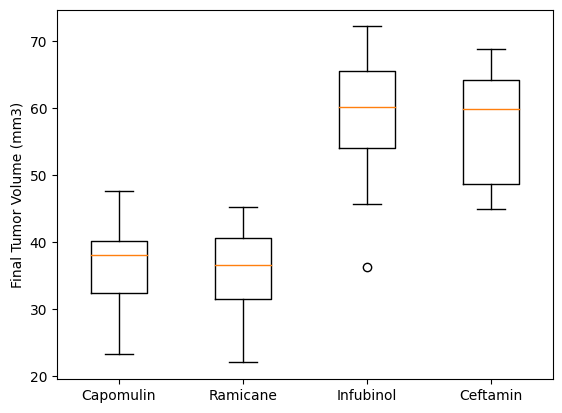

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# We can salvage some code again here.
mouse_drugs = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# We need to for loop here again to build out the series we did last time
tumor_vol = []
# Keeping part of the for loop
for drug in mouse_drugs:
    tumor = drug_df.loc[drug_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    tumor_vol.append(tumor)
    
# I sincerely appreciated the programmers who made boxplot do all its boxplotty shenanigans for us.
plt.boxplot(tumor_vol, labels=mouse_drugs)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

# I don't know how to make the dot red and apparently have an inability to ask the right stackoverflow question

## Line and Scatter Plots

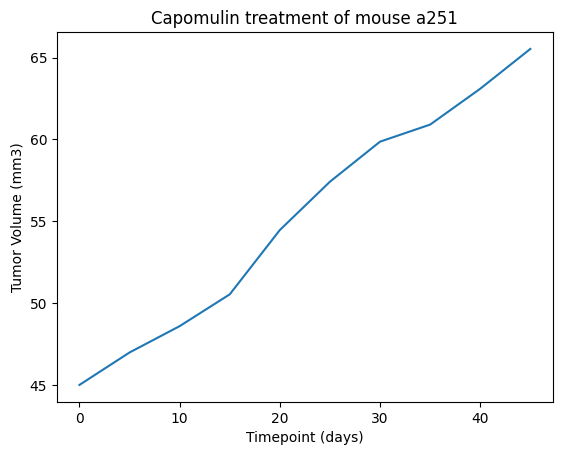

In [166]:
# We need to go back to the original df for this one.
# Select our mouse df
mouse = df.loc[(df['Mouse ID'] == 'a251')]
# Plot the values for the mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse a251')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
# Unfortunately Ifubinol did not help this mouse much.

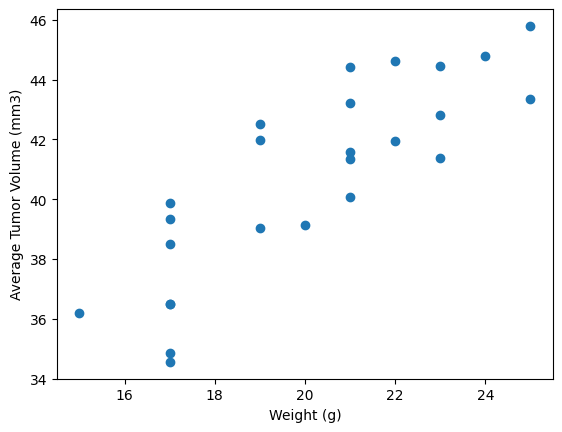

In [167]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Establish the starting df
cap = df.loc[df['Drug Regimen']=='Capomulin']
# Calculate the mean by tumor volume
avg_tum = cap.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Calculate the weight
avg_weight = cap.groupby('Mouse ID')['Weight (g)'].mean()

# Now scatter plot
plt.scatter(avg_weight, avg_tum)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


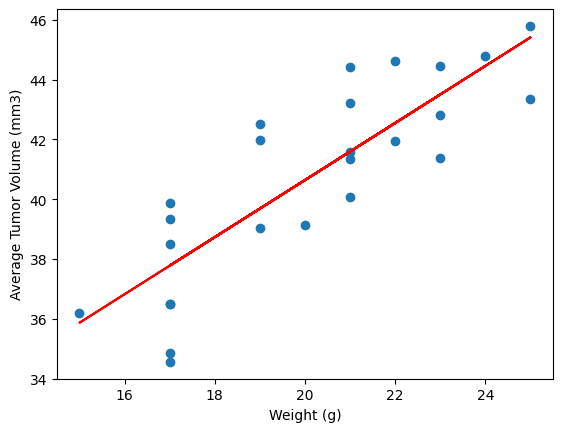

In [168]:
# This is just pulled directly from the regression_soluion file on day 3 solution.

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tum)
regress_values = avg_weight *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_weight,avg_tum)
plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue,2)}")
plt.show()